<img src="Title.PNG">

**Albert Opoku - Senior Statistical Consultant at Allianca data Inc**
- Masters in Financial Economics from Ohio University
- Bachelors in Economics from Kwame Nkrumah University of Science and Technology
**Contact me:**
- twitter @opalbert
- linkedIn Albert Opoku
- email opalkabert@gmail.com
- website www.opokualbert.com

**Business Problem:**
- Your boss ask you to help him understand why your customers churn and which of your customers are likely to leave the services provided by your company.
- What are the factors that make customers leave or stay with your company?

**This can be solved by:**
- Exploring and analysing the data with visuals
- Build a supervised classification model

**The dataset:**
- **Services table** – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
- **Account table** – status, tenure, contract type, payment method, billing method, monthly charge, and total revenue to the compny
- **Demographic table** – gender, age range, family information

The dataset we are using is saved here, originally from kaggle.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import pandas_profiling as pdf
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns; sns.set()

import io
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import plotly.figure_factory as ff

In [2]:
pd.set_option('max_colwidth', 1000)
pd.options.display.max_rows = 500
pd.options.display.max_rows = 999

df= pd.read_csv("Telco_Customer_Churn.csv")

In [3]:
df.shape

(7043, 21)

In [4]:
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [6]:
df.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

In [7]:
df.describe(include=object).T

count unique               top  freq
customerID        7043   7043        8069-YQQAJ     1
gender            7043      2              Male  3555
Partner           7043      2                No  3641
Dependents        7043      2                No  4933
PhoneService      7043      2               Yes  6361
MultipleLines     7043      3                No  3390
InternetService   7043      3       Fiber optic  3096
OnlineSecurity    7043      3                No  3498
OnlineBackup      7043      3                No  3088
DeviceProtection  7043      3                No  3095
TechSupport       7043      3                No  3473
StreamingTV       7043      3                No  2810
StreamingMovies   7043      3                No  2785
Contract          7043      3    Month-to-month  3875
PaperlessBilling  7043      2               Yes  4171
PaymentMethod     7043      4  Electronic check  2365
TotalCharges      7043   6531              20.2    11
Churn             7043      2                No  5174

In [8]:
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [9]:
pdf.ProfileReport(df)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

In [11]:
# Let us convert the TotalCharges column object to numeric feature
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors = 'coerce')

Are there missing values in any of the columns?

In [12]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [13]:
# fill the missing values with the mean value total charges
df["TotalCharges"].fillna(df["TotalCharges"].mean(), inplace=True)

In [14]:
df.TotalCharges.isnull().sum()

0

In [15]:
df1 = df.copy()

In [16]:
df1["SeniorCitizen"] = df1["SeniorCitizen"].map({1:"Yes",0:"No"})

In [17]:
#Turn Tenure feature to categorical column
def tenure_cat(df1) :
    
    if df1["tenure"] <= 12 :
        return "Tenure_0-12"
    elif (df1["tenure"] > 12) & (df1["tenure"] <= 24 ):
        return "Tenure_12-24"
    elif (df1["tenure"] > 24) & (df1["tenure"] <= 48) :
        return "Tenure_24-48"
    elif (df1["tenure"] > 48) & (df1["tenure"] <= 60) :
        return "Tenure_48-60"
    elif df1["tenure"] > 60 :
        return "Tenure_gt_60"
df1["tenure_group"] = df1.apply(lambda df1:tenure_cat(df1),
                                      axis = 1)

In [18]:
df1.head()

customerID  gender SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female            No     Yes         No       1           No   
1  5575-GNVDE    Male            No      No         No      34          Yes   
2  3668-QPYBK    Male            No      No         No       2          Yes   
3  7795-CFOCW    Male            No      No         No      45           No   
4  9237-HQITU  Female            No      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... TechSupport  \
0  No phone service             DSL             No  ...          No   
1                No             DSL            Yes  ...          No   
2                No             DSL            Yes  ...          No   
3  No phone service             DSL            Yes  ...         Yes   
4                No     Fiber optic             No  ...          No   

  StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No              No  Month-to-month              Yes   
1          No              No        One year               No   
2          No              No  Month-to-month              Yes   
3          No              No        One year               No   
4          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges TotalCharges  Churn  tenure_group  
0           Electronic check          29.85        29.85     No   Tenure_0-12  
1               Mailed check          56.95      1889.50     No  Tenure_24-48  
2               Mailed check          53.85       108.15    Yes   Tenure_0-12  
3  Bank transfer (automatic)          42.30      1840.75     No  Tenure_24-48  
4           Electronic check          70.70       151.65    Yes   Tenure_0-12  

[5 rows x 22 columns]

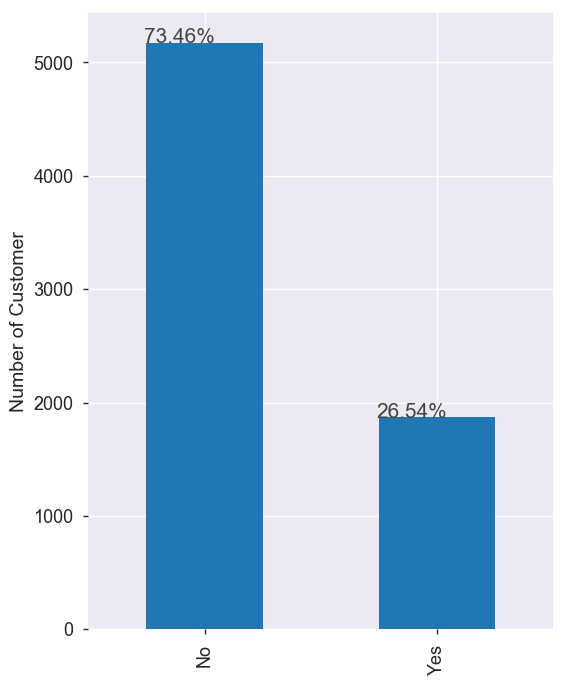

In [19]:
ax = df1["Churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

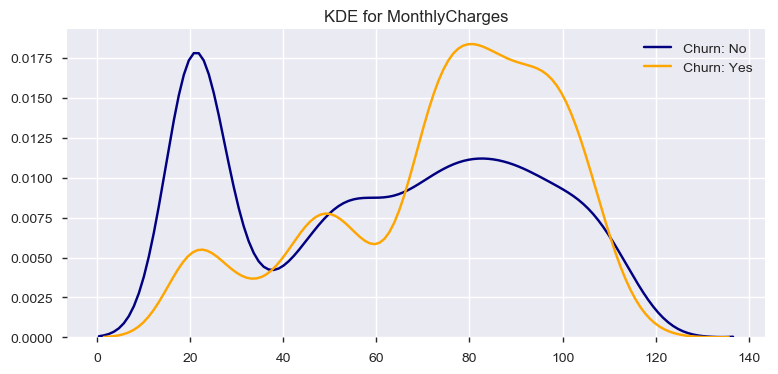

In [20]:
def kdeplot(feature):
    plt.figure(figsize=(9, 4))
    plt.title("KDE for {}".format(feature))
    ax0 = sns.kdeplot(df1[df1['Churn'] == 'No'][feature].dropna(), color= 'navy', label= 'Churn: No')
    ax1 = sns.kdeplot(df1[df1['Churn'] == 'Yes'][feature].dropna(), color= 'orange', label= 'Churn: Yes')
# kdeplot('tenure')
kdeplot('MonthlyCharges')

### customers that pay higher monthly charges are more likely to churn

In [23]:
df1['MonthlyCharges'].loc[df1['Churn'] == 'Yes'].describe()

count    1869.000000
mean       74.441332
std        24.666053
min        18.850000
25%        56.150000
50%        79.650000
75%        94.200000
max       118.350000
Name: MonthlyCharges, dtype: float64

In [24]:
df1['MonthlyCharges'].loc[df1['Churn'] == 'No'].describe()

count    5174.000000
mean       61.265124
std        31.092648
min        18.250000
25%        25.100000
50%        64.425000
75%        88.400000
max       118.750000
Name: MonthlyCharges, dtype: float64

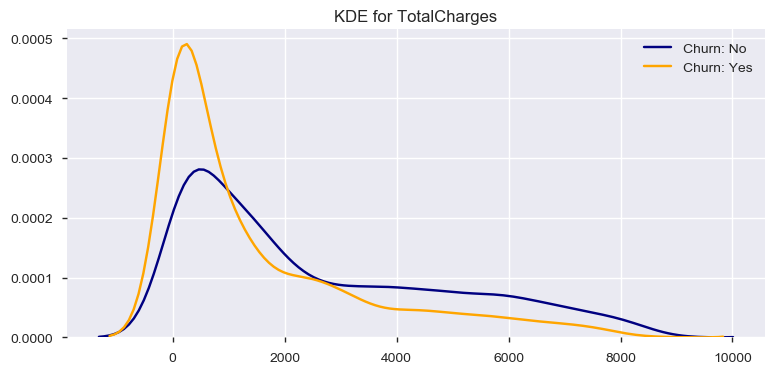

In [25]:
kdeplot('TotalCharges')

In [26]:
df1['TotalCharges'].loc[df1['Churn'] == 'Yes'].describe()

count    1869.000000
mean     1531.796094
std      1890.822994
min        18.850000
25%       134.500000
50%       703.550000
75%      2331.300000
max      8684.800000
Name: TotalCharges, dtype: float64

In [27]:
df1['TotalCharges'].loc[df1['Churn'] == 'No'].describe()

count    5174.000000
mean     2554.765772
std      2327.012699
min        18.800000
25%       579.575000
50%      1689.175000
75%      4262.850000
max      8672.450000
Name: TotalCharges, dtype: float64

In [28]:
df1[['MonthlyCharges', 'TotalCharges','tenure',"tenure_group"]]

#scatter plot monthly charges & total charges by tenure group

def plot_tenure_scatter(tenure_group,color) :
    tracer = go.Scatter(x = df1[df1["tenure_group"] == tenure_group]["MonthlyCharges"],
                        y = df1[df1["tenure_group"] == tenure_group]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = tenure_group,
                        opacity = .9
                       )
    return tracer

#scatter plot monthly charges & total charges by churn group
def plot_churncharges_scatter(churn,color) :
    tracer = go.Scatter(x = df1[df1["Churn"] == churn]["MonthlyCharges"],
                        y = df1[df1["Churn"] == churn]["TotalCharges"],
                        mode = "markers",marker = dict(line = dict(color = "black",
                                                                   width = .2),
                                                       size = 4 , color = color,
                                                       symbol = "diamond-dot",
                                                      ),
                        name = "Churn - " + churn,
                        opacity = .9
                       )
    return tracer

trace1 = plot_tenure_scatter("Tenure_0-12","#FF3300")
trace2 = plot_tenure_scatter("Tenure_12-24","#6666FF")
trace3 = plot_tenure_scatter("Tenure_24-48","#99FF00")
trace4 = plot_tenure_scatter("Tenure_48-60","#996600")
trace5 = plot_tenure_scatter("Tenure_gt_60","grey")
trace6 = plot_churncharges_scatter("Yes","red")
trace7 = plot_churncharges_scatter("No","blue")

data1   = [trace1,trace2,trace3,trace4,trace5] 
data2   = [trace7,trace6]

#layout
def layout_title(title) :
    layout = go.Layout(dict(title = title,
                            plot_bgcolor  = "rgb(243,243,243)",
                            paper_bgcolor = "rgb(243,243,243)",
                            xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Monthly charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                         title = "Total Charges",
                                         zerolinewidth=1,ticklen=5,gridwidth=2),
                            height = 600
                           )
                      )
    return layout

layout1  = layout_title("Monthly Charges & Total Charges by Tenure group")
layout2  = layout_title("Monthly Charges & Total Charges by Churn group")
fig1 = go.Figure(data = data1,layout = layout1)
fig2 = go.Figure(data = data2,layout = layout2)

In [29]:
py.iplot(fig1)

* Upper left conner customers have been the top revenue customers compared to bottom left.
* As a business, do you want to focus on them or those who have the potential to be at the upper right?


In [30]:
py.iplot(fig2)

The above plot comfirms that those who pay higher monthly charges most of them leave early. And this imparts your future revenue

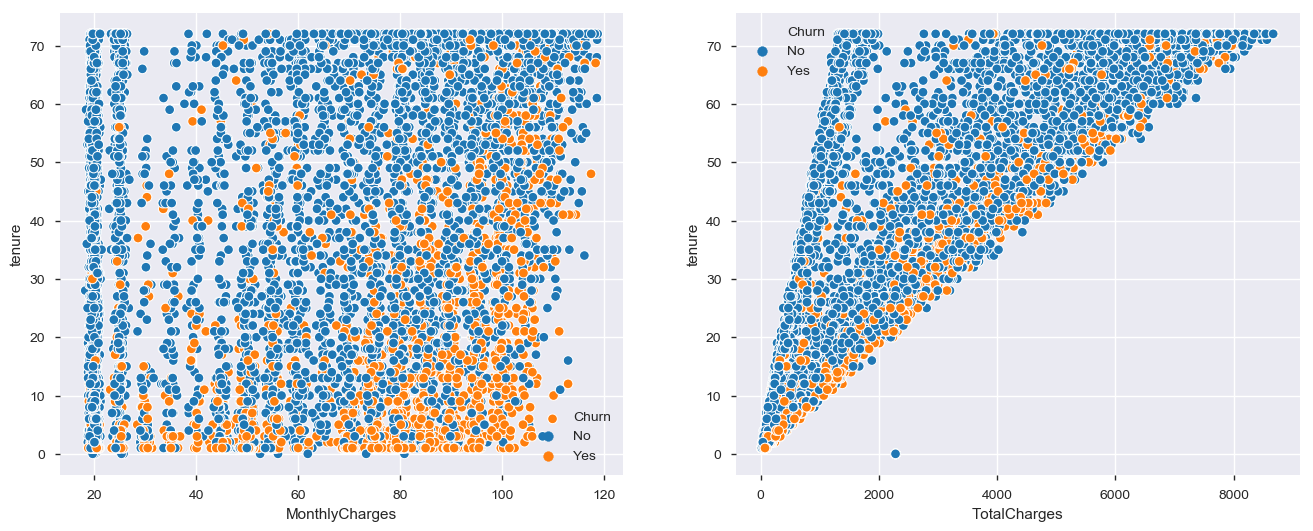

In [31]:
_, ax = plt.subplots(1, 2, figsize= (16, 6))
sns.scatterplot(x="MonthlyCharges", y = "tenure" , hue="Churn", data=df1, ax=ax[0])
sns.scatterplot(x="TotalCharges", y = "tenure" , hue="Churn", data=df1, ax=ax[1])

In [32]:
df1['tenure'].loc[df1['Churn'] == 'Yes'].describe()

count    1869.000000
mean       17.979133
std        19.531123
min         1.000000
25%         2.000000
50%        10.000000
75%        29.000000
max        72.000000
Name: tenure, dtype: float64

In [33]:
df1['tenure'].loc[df1['Churn'] == 'No'].describe()

count    5174.000000
mean       37.569965
std        24.113777
min         0.000000
25%        15.000000
50%        38.000000
75%        61.000000
max        72.000000
Name: tenure, dtype: float64

Those who stay have 20 months more tenure than those who leave. Just emphasises what we have seen above

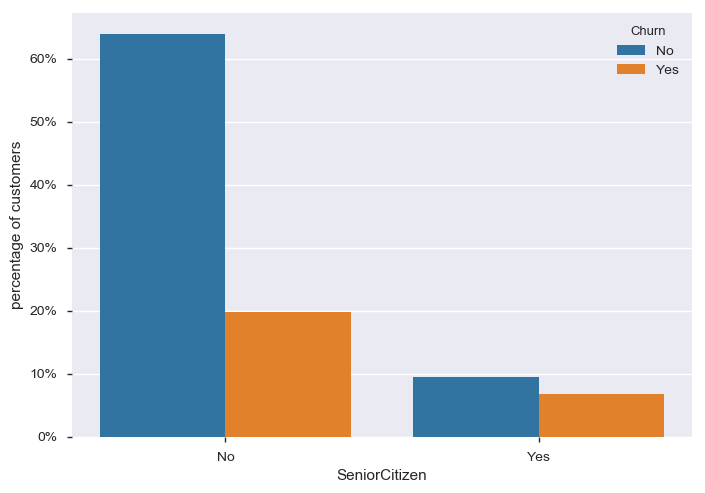

In [34]:
def barplot_percentages(feature, orient='v', axis_name="percentage of customers"):
    ratios = pd.DataFrame()
    g = df1.groupby(feature)["Churn"].value_counts().to_frame()
    g = g.rename({"Churn": axis_name}, axis=1).reset_index()
    g[axis_name] = g[axis_name]/len(df1)
    if orient == 'v':
        ax = sns.barplot(x=feature, y= axis_name, hue='Churn', data=g, orient=orient)
        ax.set_yticklabels(['{:,.0%}'.format(y) for y in ax.get_yticks()])
    else:
        ax = sns.barplot(x= axis_name, y=feature, hue='Churn', data=g, orient=orient)
        ax.set_xticklabels(['{:,.0%}'.format(x) for x in ax.get_xticks()])
    ax.plot()
barplot_percentages("SeniorCitizen")

### 16 % of the customers were SeniorCitizens, but they have a much higher churn rate of 42% compared to churn rate 23% for non-senior customers. Asa business, you can focus your attention on them or otherwise.

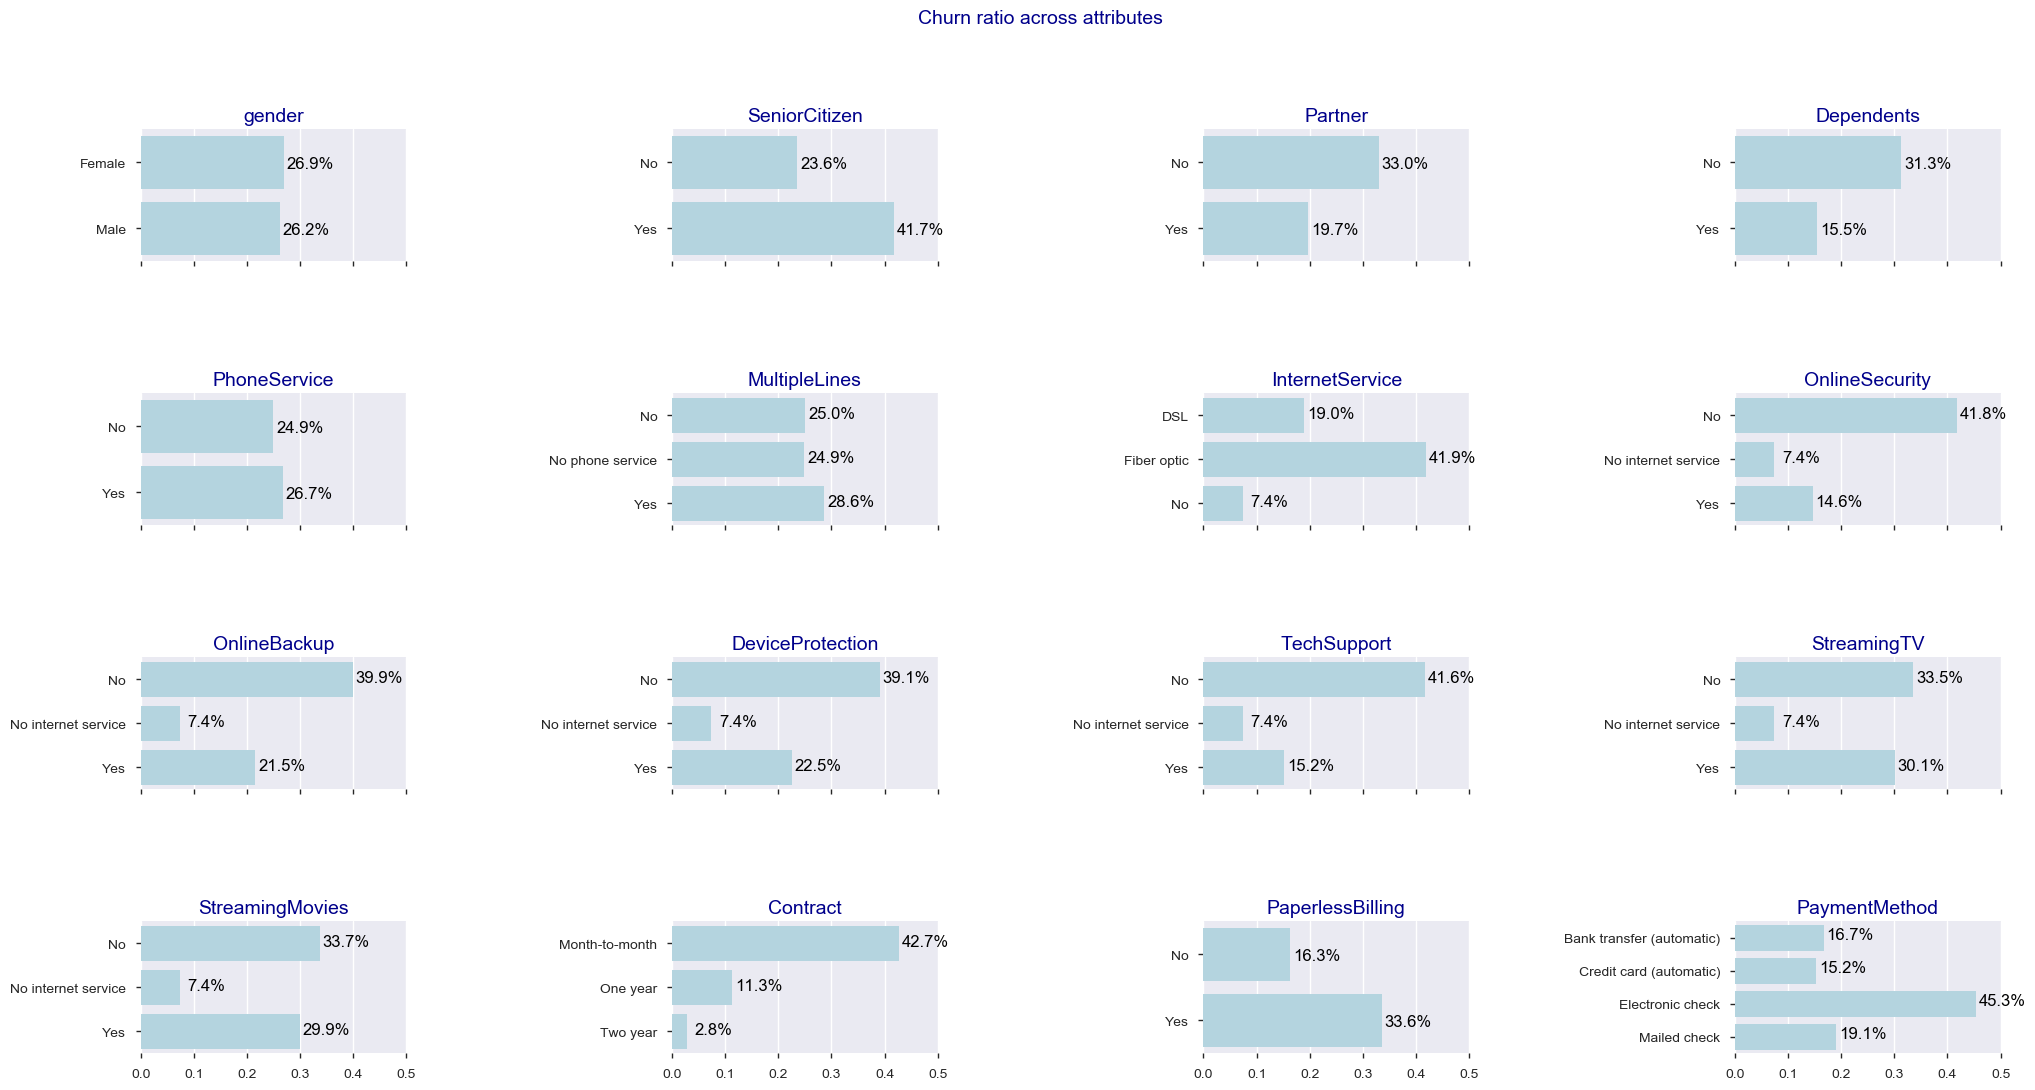

In [35]:
cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 
        'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 
        'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 
        'Contract', 'PaperlessBilling', 'PaymentMethod']

fig, ax = plt.subplots(4,4,figsize=(24,12), sharex=True)

j=0
k=0
    
for i in cols:
    temp = df1.pivot_table(df1, index=[i], columns=['Churn'], aggfunc=len).reset_index()[[i,'tenure']]
    temp.columns=[i,'Churn_N','Churn_Y']
    temp['Churn_ratio']=(temp['Churn_Y'])/(temp['Churn_Y']+temp['Churn_N'])
    
    a = sns.barplot(x='Churn_ratio', y=i, data=temp, ax=ax[j][k], color="lightblue")
    a.set_yticklabels(labels=temp[i])
    for p in ax[j][k].patches:
        ax[j][k].text(p.get_width() + .05, p.get_y() + p.get_height()/1.5, '{:,.1%}'.format(p.get_width()),
                   fontsize=12, color='black', ha='center', va='bottom')
    ax[j][k].set_xlabel('', size=12, color="darkblue")
    ax[j][k].set_ylabel('', size=12, color="darkblue", rotation=0, horizontalalignment='right')
    ax[j][k].set_title(i, size=14, color="darkblue")
    #print(j,k)
    if k==3: 
        j=j+1
        k=0
    else:
        k=k+1 
    
fig.suptitle("Churn ratio across attributes", fontsize=14, family='sans-serif', color="darkblue")
plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                    wspace=1, hspace=1)
plt.xlim(0,.5)
plt.show()

#### Data Visualizations

- 45% of the users paying via electronic check churn
- 43% of the users under month-to-month contract churn
- 42% of the users with fiber optic internet churn
- 42% of the users no online security churn
- 42% of the users opting no for TechSupport churn
- 42% of the senior citizen users churn
- 40% of the users with no OnlineBackup churn
- 39% of the users with no DeviceProtection churn

In [36]:
# Import the needed Packages
from sklearn.preprocessing import StandardScaler,MinMaxScaler, LabelEncoder
import collections
from sklearn import preprocessing 
from sklearn.metrics import (confusion_matrix, precision_recall_curve, auc, roc_curve, recall_score, classification_report, f1_score, precision_recall_fscore_support)
from sklearn.model_selection import train_test_split

In [37]:
labl_encode = preprocessing.LabelEncoder()
df1['Churn'] = labl_encode.fit_transform(df1.Churn.values)

In [38]:
df1.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
tenure_group           5
dtype: int64

In [39]:
Id_col     = ['customerID']
#Target columns
target_col = ["Churn"]
#categorical columns
cat_cols   = df1.nunique()[df1.nunique() < 6].keys().tolist()
cat_cols   = [x for x in cat_cols if x not in target_col]
#numerical columns
num_cols   = [x for x in df1.columns if x not in cat_cols + target_col + Id_col]
#Binary columns with 2 values
bin_cols   = df1.nunique()[df1.nunique() == 2].keys().tolist()
#Columns more than 2 values
multi_cols = [i for i in cat_cols if i not in bin_cols]

In [40]:
le = LabelEncoder()
for i in bin_cols :
    df1[i] = le.fit_transform(df1[i])

In [41]:
df1 = pd.get_dummies(data = df1,columns = multi_cols )

In [42]:
df1.head()

customerID  gender  SeniorCitizen  Partner  Dependents  tenure  \
0  7590-VHVEG       0              0        1           0       1   
1  5575-GNVDE       1              0        0           0      34   
2  3668-QPYBK       1              0        0           0       2   
3  7795-CFOCW       1              0        0           0      45   
4  9237-HQITU       0              0        0           0       2   

   PhoneService  PaperlessBilling  MonthlyCharges  TotalCharges  ...  \
0             0                 1           29.85         29.85  ...   
1             1                 0           56.95       1889.50  ...   
2             1                 1           53.85        108.15  ...   
3             0                 0           42.30       1840.75  ...   
4             1                 1           70.70        151.65  ...   

   Contract_Two year  PaymentMethod_Bank transfer (automatic)  \
0                  0                                        0   
1                  0                                        0   
2                  0                                        0   
3                  0                                        1   
4                  0                                        0   

   PaymentMethod_Credit card (automatic)  PaymentMethod_Electronic check  \
0                                      0                               1   
1                                      0                               0   
2                                      0                               0   
3                                      0                               0   
4                                      0                               1   

   PaymentMethod_Mailed check  tenure_group_Tenure_0-12  \
0                           0                         1   
1                           1                         0   
2                           1                         1   
3                           0                         0   
4                           0                         1   

   tenure_group_Tenure_12-24  tenure_group_Tenure_24-48  \
0                          0                          0   
1                          0                          1   
2                          0                          0   
3                          0                          1   
4                          0                          0   

   tenure_group_Tenure_48-60  tenure_group_Tenure_gt_60  
0                          0                          0  
1                          0                          0  
2                          0                          0  
3                          0                          0  
4                          0                          0  

[5 rows x 47 columns]

In [43]:
std = StandardScaler()
scaled = std.fit_transform(df1[num_cols])
scaled = pd.DataFrame(scaled,columns=num_cols)

In [44]:
df2 = df1.copy()
df1 = df1.drop(columns = num_cols,axis = 1)
df1 = df1.merge(scaled,left_index=True,right_index=True,how = "left")

In [45]:
df1.head()

customerID  gender  SeniorCitizen  Partner  Dependents  PhoneService  \
0  7590-VHVEG       0              0        1           0             0   
1  5575-GNVDE       1              0        0           0             1   
2  3668-QPYBK       1              0        0           0             1   
3  7795-CFOCW       1              0        0           0             0   
4  9237-HQITU       0              0        0           0             1   

   PaperlessBilling  Churn  MultipleLines_No  MultipleLines_No phone service  \
0                 1      0                 0                               1   
1                 0      0                 1                               0   
2                 1      1                 1                               0   
3                 0      0                 0                               1   
4                 1      1                 1                               0   

   ...  PaymentMethod_Electronic check  PaymentMethod_Mailed check  \
0  ...                               1                           0   
1  ...                               0                           1   
2  ...                               0                           1   
3  ...                               0                           0   
4  ...                               1                           0   

   tenure_group_Tenure_0-12  tenure_group_Tenure_12-24  \
0                         1                          0   
1                         0                          0   
2                         1                          0   
3                         0                          0   
4                         1                          0   

   tenure_group_Tenure_24-48  tenure_group_Tenure_48-60  \
0                          0                          0   
1                          1                          0   
2                          0                          0   
3                          1                          0   
4                          0                          0   

   tenure_group_Tenure_gt_60    tenure  MonthlyCharges  TotalCharges  
0                          0 -1.277445       -1.160323     -0.994971  
1                          0  0.066327       -0.259629     -0.173876  
2                          0 -1.236724       -0.362660     -0.960399  
3                          0  0.514251       -0.746535     -0.195400  
4                          0 -1.236724        0.197365     -0.941193  

[5 rows x 47 columns]

In [46]:
df1.nunique()

customerID                                 7043
gender                                        2
SeniorCitizen                                 2
Partner                                       2
Dependents                                    2
PhoneService                                  2
PaperlessBilling                              2
Churn                                         2
MultipleLines_No                              2
MultipleLines_No phone service                2
MultipleLines_Yes                             2
InternetService_DSL                           2
InternetService_Fiber optic                   2
InternetService_No                            2
OnlineSecurity_No                             2
OnlineSecurity_No internet service            2
OnlineSecurity_Yes                            2
OnlineBackup_No                               2
OnlineBackup_No internet service              2
OnlineBackup_Yes                              2
DeviceProtection_No                     

In [47]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 2)

X = df1[[i for i in df1.columns if i not in Id_col + target_col]]
Y = df1[target_col + Id_col]

principal_components = pca.fit_transform(X)
pca_data = pd.DataFrame(principal_components,columns = ["PC1","PC2"])
pca_data = pca_data.merge(Y,left_index=True,right_index=True,how="left")
pca_data["Churn"] = pca_data["Churn"].replace({1:"Churn",0:"Not Churn"})

def pca_scatter(target,color) :
    tracer = go.Scatter(x = pca_data[pca_data["Churn"] == target]["PC1"] ,
                        y = pca_data[pca_data["Churn"] == target]["PC2"],
                        name = target,mode = "markers",
                        marker = dict(color = color,
                                      line = dict(width = .5),
                                      symbol =  "diamond-open"),
                        text = ("Customer Id : " + 
                                pca_data[pca_data["Churn"] == target]['customerID'])
                       )
    return tracer

layout = go.Layout(dict(title = "Visualising data with principal components",
                        plot_bgcolor  = "rgb(243,243,243)",
                        paper_bgcolor = "rgb(243,243,243)",
                        xaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 1",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        yaxis = dict(gridcolor = 'rgb(255, 255, 255)',
                                     title = "principal component 2",
                                     zerolinewidth=1,ticklen=5,gridwidth=2),
                        height = 600
                       )
                  )
trace1 = pca_scatter("Churn",'red')
trace2 = pca_scatter("Not Churn",'royalblue')
data = [trace2,trace1]
fig = go.Figure(data=data,layout=layout)
py.iplot(fig)

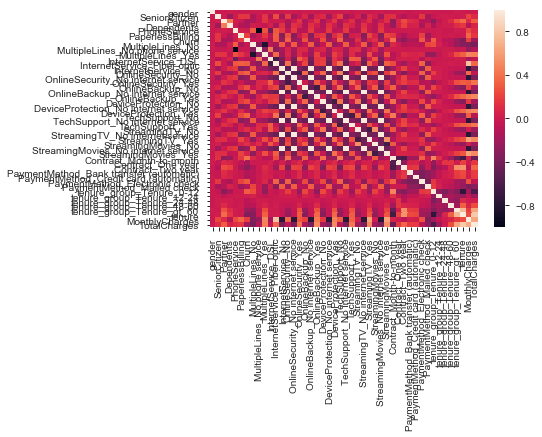

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 15))
%matplotlib inline
corr = df1.corr()
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [49]:
features = df1[df1.columns.difference(['Churn','customerID'])]
labels = df1['Churn']

[0]	train-auc:0.817429	eval-auc:0.817527
Multiple eval metrics have been passed: 'eval-auc' will be used for early stopping.

Will train until eval-auc hasn't improved in 500 rounds.
[50]	train-auc:0.853544	eval-auc:0.856092
[100]	train-auc:0.86328	eval-auc:0.859117
[150]	train-auc:0.869756	eval-auc:0.859707
[200]	train-auc:0.87608	eval-auc:0.858772
[250]	train-auc:0.881192	eval-auc:0.857562
[300]	train-auc:0.886295	eval-auc:0.856418
[350]	train-auc:0.890629	eval-auc:0.855489
[400]	train-auc:0.894612	eval-auc:0.854935
[450]	train-auc:0.89915	eval-auc:0.853727
[500]	train-auc:0.903067	eval-auc:0.85322
[550]	train-auc:0.90672	eval-auc:0.852423
[600]	train-auc:0.909827	eval-auc:0.851732
Stopping. Best iteration:
[144]	train-auc:0.868948	eval-auc:0.85978



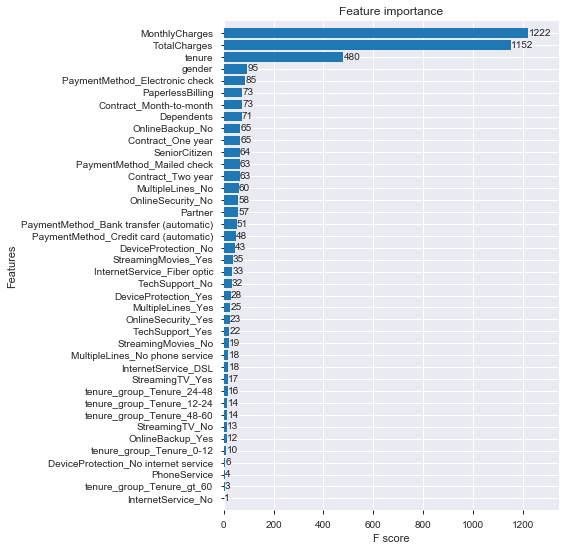

In [51]:
# run simple xgboost classification model and check 
# prep modeling code
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(features, 
                                                 labels, 
                                                 test_size=0.3, 
                                                 random_state=42)

import xgboost  as xgb
xgb_params = {
    'max_depth':3, 
    'eta':0.05, 
    'silent':0, 
    'eval_metric':'auc',
    'subsample': 0.8,
    'colsample_bytree': 0.8,
    'objective':'binary:logistic',
    'seed' : 0
}

dtrain = xgb.DMatrix(X_train, y_train, feature_names = features)
dtest = xgb.DMatrix(X_test, y_test, feature_names = features)
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train (params = xgb_params,
              dtrain = dtrain,
              num_boost_round = 2000,
              verbose_eval=50, 
              early_stopping_rounds = 500,
              evals=evals,
              #feval = f1_score_cust,
              maximize = True)
 
# plot the important features  
fig, ax = plt.subplots(figsize=(6,9))
xgb.plot_importance(xgb_model,  height=0.8, ax=ax)
plt.show()

In [52]:
# get dataframe version of important feature for model 
xgb_fea_imp=pd.DataFrame(list(xgb_model.get_fscore().items()),
columns=['feature','importance']).sort_values('importance', ascending=False)
xgb_fea_imp.head(10)

feature  importance
1                   MonthlyCharges        1222
4                     TotalCharges        1152
6                           tenure         480
30                          gender          95
9   PaymentMethod_Electronic check          85
0          Contract_Month-to-month          73
15                PaperlessBilling          73
29                      Dependents          71
2                Contract_One year          65
14                 OnlineBackup_No          65

# Deep Learning

<img src="Hidden_layer.JPG">

In [55]:
import tensorflow as tf

In [56]:
train_sample = np.array(X_train)
train_label = np.array(y_train)
test_sample = np.array(X_test)
test_label = np.array(y_test)

In [57]:
features.shape

(7043, 45)

In [58]:
model = tf.keras.models.Sequential([
tf.keras.layers.Flatten(input_shape=(45,)),
tf.keras.layers.Dense(2, activation=tf.nn.softmax,)   
])

In [59]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 45)                0         
_________________________________________________________________
dense (Dense)                (None, 2)                 92        
Total params: 92
Trainable params: 92
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [61]:
model.fit(train_sample, train_label,validation_split=0.2, batch_size=4, shuffle = True, epochs=50)

Train on 3944 samples, validate on 986 samples
Epoch 1/50
3944/3944 [==============================] - 1s 344us/sample - loss: 0.6247 - accuracy: 0.6719 - val_loss: 0.4651 - val_accuracy: 0.7850
Epoch 2/50
3944/3944 [==============================] - 1s 304us/sample - loss: 0.4630 - accuracy: 0.7842 - val_loss: 0.4378 - val_accuracy: 0.7951
Epoch 3/50
3944/3944 [==============================] - 1s 295us/sample - loss: 0.4486 - accuracy: 0.7908 - val_loss: 0.4279 - val_accuracy: 0.7982
Epoch 4/50
3944/3944 [==============================] - 1s 284us/sample - loss: 0.4421 - accuracy: 0.7954 - val_loss: 0.4223 - val_accuracy: 0.8032
Epoch 5/50
3944/3944 [==============================] - 1s 285us/sample - loss: 0.4382 - accuracy: 0.7987 - val_loss: 0.4198 - val_accuracy: 0.8063
Epoch 6/50
3944/3944 [==============================] - 1s 283us/sample - loss: 0.4359 - accuracy: 0.8012 - val_loss: 0.4174 - val_accuracy: 0.8103
Epoch 7/50
3944/3944 [==============================] - 1s 296us/

In [62]:
test_loss, test_acc =model.evaluate(test_sample,test_label)
print('Test Accuracy:', test_acc)

2113/2113 [==============================] - 0s 22us/sample - loss: 0.4089 - accuracy: 0.8017
Test Accuracy: 0.80170375


# Deep Learning

In [63]:
model_deep = tf.keras.models.Sequential([
tf.keras.layers.Dense(256, activation='relu', input_shape=(45,)),
tf.keras.layers.Dense(256,  activation=tf.nn.relu),
tf.keras.layers.Dense(128,  activation=tf.nn.relu),
tf.keras.layers.Dense(2, activation=tf.nn.softmax,)   
])

In [64]:
model_deep.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               11776     
_________________________________________________________________
dense_2 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_3 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 258       
Total params: 110,722
Trainable params: 110,722
Non-trainable params: 0
_________________________________________________________________


In [65]:
model_deep.compile(optimizer='sgd',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [66]:
model_deep.fit(train_sample, train_label,validation_split=0.2, batch_size=4, shuffle = True, epochs=20)

Train on 3944 samples, validate on 986 samples
Epoch 1/20
3944/3944 [==============================] - 2s 539us/sample - loss: 0.5455 - accuracy: 0.7084 - val_loss: 0.4606 - val_accuracy: 0.7606
Epoch 2/20
3944/3944 [==============================] - 2s 491us/sample - loss: 0.4605 - accuracy: 0.7748 - val_loss: 0.4299 - val_accuracy: 0.7972
Epoch 3/20
3944/3944 [==============================] - 2s 560us/sample - loss: 0.4411 - accuracy: 0.7931 - val_loss: 0.4182 - val_accuracy: 0.8022
Epoch 4/20
3944/3944 [==============================] - 2s 525us/sample - loss: 0.4335 - accuracy: 0.8002 - val_loss: 0.4134 - val_accuracy: 0.8063
Epoch 5/20
3944/3944 [==============================] - 2s 518us/sample - loss: 0.4295 - accuracy: 0.8010 - val_loss: 0.4111 - val_accuracy: 0.8063
Epoch 6/20
3944/3944 [==============================] - 2s 517us/sample - loss: 0.4262 - accuracy: 0.8020 - val_loss: 0.4083 - val_accuracy: 0.8053
Epoch 7/20
3944/3944 [==============================] - 2s 560us/

In [ ]:
test_loss, test_acc =model_deep.evaluate(test_sample,test_label)
print('Test Accuracy:', test_acc)